**ML ASSIGNMENT2 - Vaibhav Khare**

Vaibhav Khare - 2025ab05182@wilp.bits-pilani.ac.in

# **K Nearest Neighbor Model on Portuguese banking institution**

***About Datset***

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
#Import Libraries
import os;
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Export Train, Test, Bank Details Dataset
bank_train =pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1206/ML-Assignment-Repo-2025ab05182/main/data/bank-full.csv')
bank_test =pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1206/ML-Assignment-Repo-2025ab05182/main/data/bank-test.csv')

In [3]:
# Quick Look on Train dataset - Display first 5 rows of train dataset

bank_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Get Dataset Info for Train data

bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Shape of Train Dataset
bank_train.shape

(45211, 17)

In [6]:
#Missing Value from Train Dataset
bank_train.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [7]:
# Quick Look on Test dataset - Display first 5 rows of train dataset
bank_test.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
#Get Dataset Info for Test data

bank_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
#Shape of Test Dataset
bank_test.shape

(4521, 17)

In [10]:
#Missing Value from Test Dataset
bank_test.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [11]:
#Describe bank_train dataset
bank_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
#Describe bank_test dataset
bank_test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


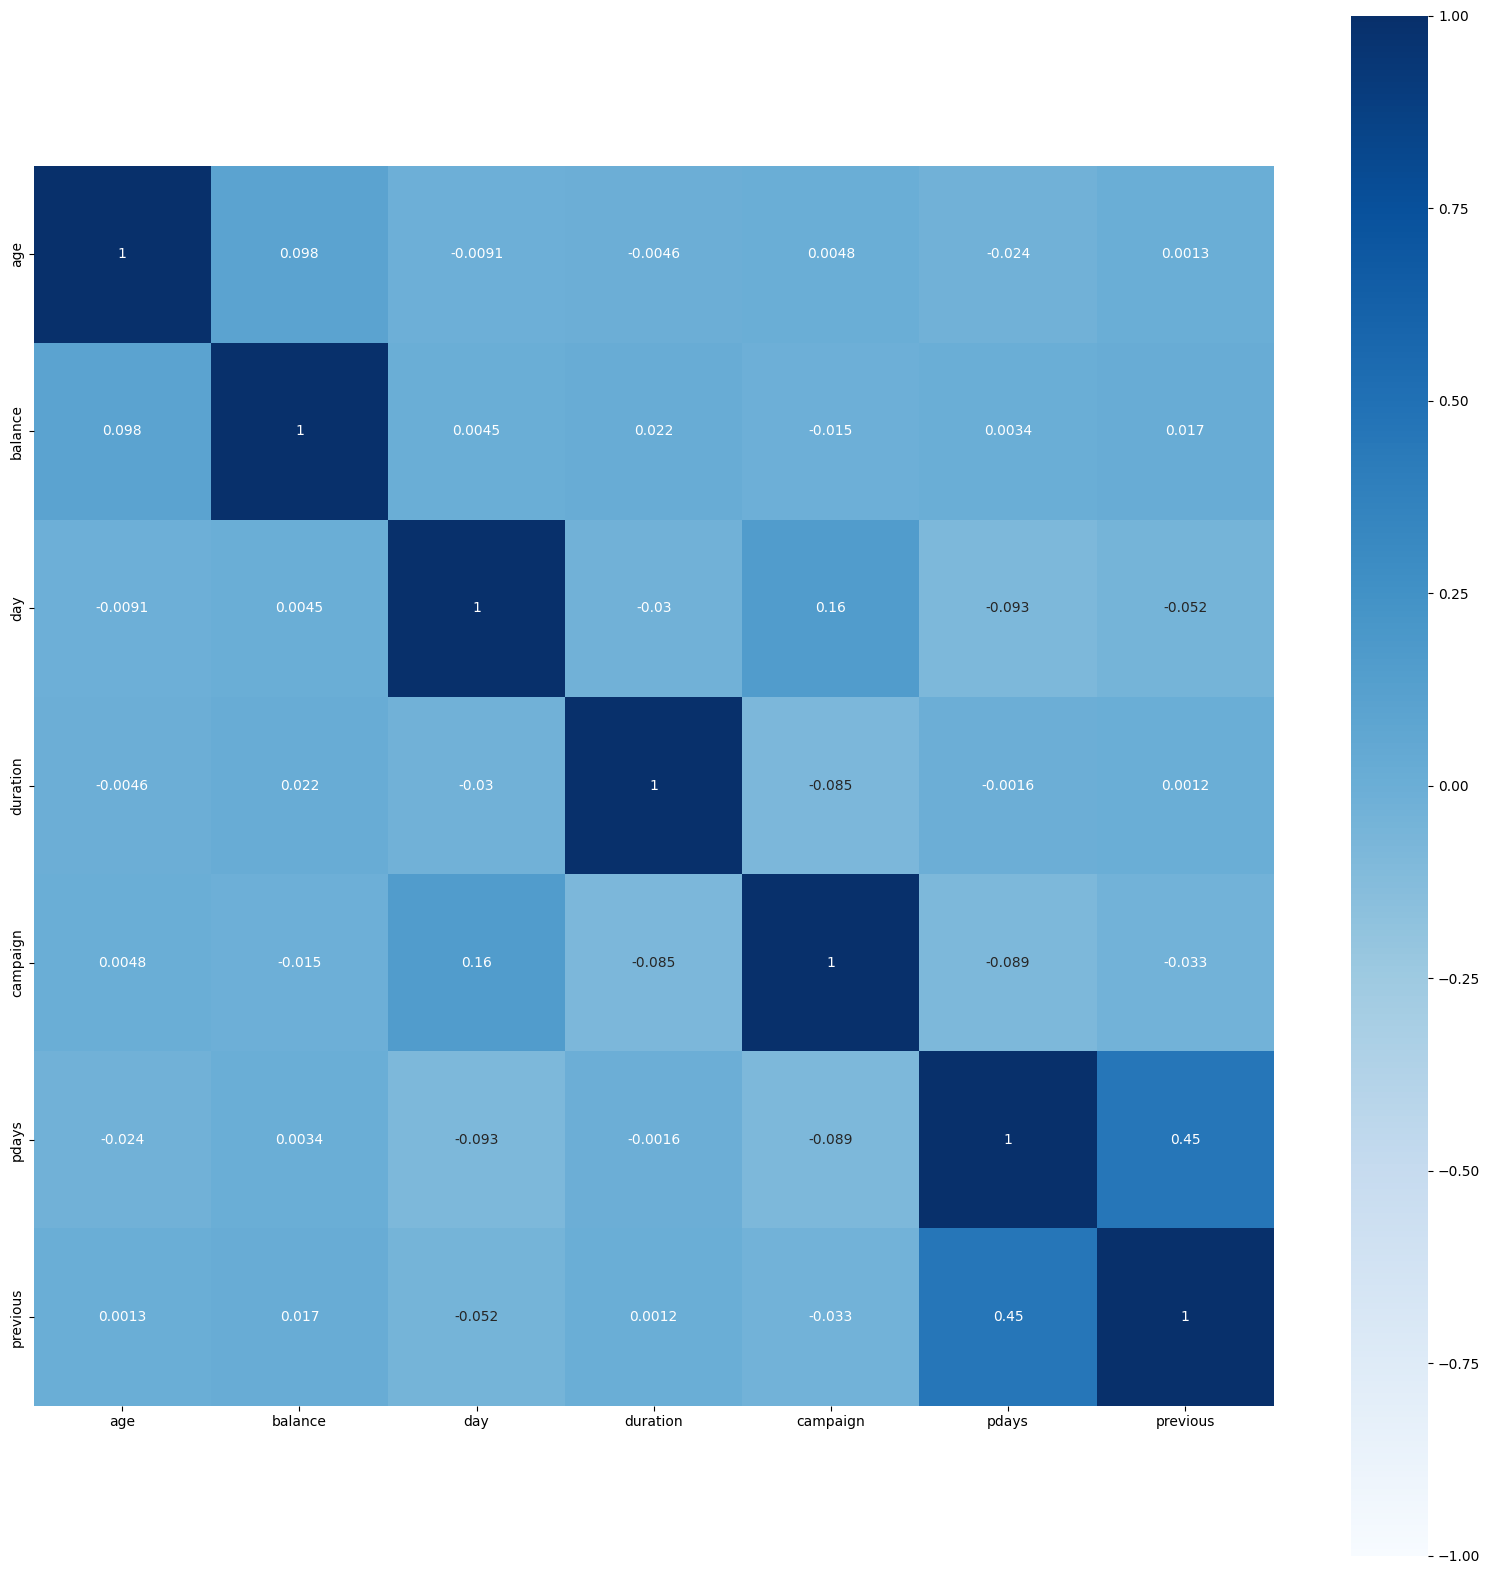

In [13]:
#Find Correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(bank_train.corr(numeric_only=True, method='pearson'),cmap='Blues',vmin=-1,vmax=1,annot=True,square=True)
plt.show()

In [14]:
#Handle Categorical features

categorical_cols = bank_train.select_dtypes(include='object').columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print(f"Identified categorical columns (excluding 'y'): {categorical_cols}")

Identified categorical columns (excluding 'y'): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [15]:
#Handle Categorical features

categorical_cols = bank_train.select_dtypes(include='object').columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print(f"Identified categorical columns (excluding 'y'): {categorical_cols}")

Identified categorical columns (excluding 'y'): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [16]:
#Apply One Hot Encoding to convert these categorical variables into a numerical format suitable for machine learning models

bank_train_encoded = pd.get_dummies(bank_train, columns=categorical_cols, drop_first=False)
bank_test_encoded = pd.get_dummies(bank_test, columns=categorical_cols, drop_first=False)

# Align columns between bank_train_encoded and bank_test_encoded
# Get all columns from the training set (bank_train_encoded)
aligned_columns = bank_train_encoded.columns.tolist()

# Reindex the test set to match the training set columns, filling missing with 0
bank_test_encoded = bank_test_encoded.reindex(columns=aligned_columns, fill_value=0)

print("Shape of bank_train_encoded:", bank_train_encoded.shape)
print("Shape of bank_test_encoded:", bank_test_encoded.shape)
print("First 5 rows of bank_train_encoded:")
print(bank_train_encoded.head())
print("\nFirst 5 rows of bank_test_encoded:")
print(bank_test_encoded.head())

Shape of bank_train_encoded: (45211, 52)
Shape of bank_test_encoded: (4521, 52)
First 5 rows of bank_train_encoded:
   age  balance  day  duration  campaign  pdays  previous   y  job_admin.  \
0   58     2143    5       261         1     -1         0  no       False   
1   44       29    5       151         1     -1         0  no       False   
2   33        2    5        76         1     -1         0  no       False   
3   47     1506    5        92         1     -1         0  no       False   
4   33        1    5       198         1     -1         0  no       False   

   job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0            False  ...      False      False       True      False   
1            False  ...      False      False       True      False   
2            False  ...      False      False       True      False   
3             True  ...      False      False       True      False   
4            False  ...      False      False       True      Fals

In [17]:
# Prepare Feature and Target Sets
X_train = bank_train_encoded.drop('y', axis=1)
y_train = bank_train_encoded['y']

X_test = bank_test_encoded.drop('y', axis=1)
y_test = bank_test_encoded['y']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (45211, 51)
Shape of y_train: (45211,)
Shape of X_test: (4521, 51)
Shape of y_test: (4521,)


In [18]:
#Apply Log Tranformation to target
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

print("Value counts of y_train after transformation:")
print(y_train.value_counts())
print(
"\nValue counts of y_test after transformation:")
print(y_test.value_counts())

Value counts of y_train after transformation:
y
0    39922
1     5289
Name: count, dtype: int64

Value counts of y_test after transformation:
y
0    4000
1     521
Name: count, dtype: int64


In [19]:
# Helper Function

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, confusion_matrix, classification_report

def evaluate_model(model, X_test, y_test, model_name, use_scaled=False):
    """Evaluate model and return metrics"""
    X_test_eval = X_test_scaled if use_scaled else X_test
    # Predictions
    y_pred = model.predict(X_test_eval)
    y_pred_proba = model.predict_proba(X_test_eval) if hasattr(model, 'predict_proba') else None
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)
    if y_pred_proba is not None:
        # For binary classification, roc_auc_score expects y_true (1D) and y_score (probabilities of the positive class, 1D)
        auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    else:
        auc = 0.0
    cm = confusion_matrix(y_test, y_pred)
    return {
        'model_name': model_name,
        'accuracy': round(accuracy, 4),
        'auc': round(auc, 4),
        'precision': round(precision, 4),
        'recall': round(recall, 4),
        'f1': round(f1, 4),
        'mcc': round(mcc, 4),
        'confusion_matrix': cm
    }

In [20]:
# Initialize and Train K-Nearest Neighbors Classifier

# # Import Library for K-Nearest Neighbors Classifier and Standard Scalar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the K-Nearest Neighburs Classifier
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Train the model
knn_model.fit(X_train_scaled, y_train)

#Append Log Results to
knn_model_results = evaluate_model(knn_model, X_test_scaled, y_test, "K-Nearest Neighbors Classifier", use_scaled=False) # Pass scaled X_test directly

print("K-Nearest Neighbors Classifier trained successfully.")

K-Nearest Neighbors Classifier trained successfully.


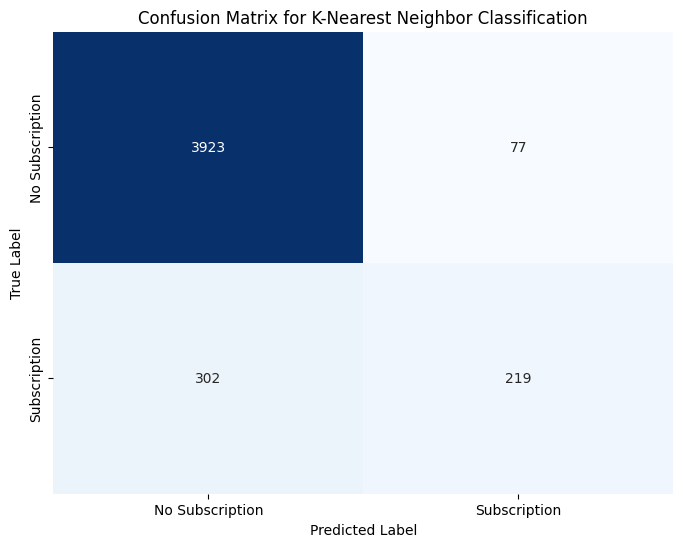

In [21]:
# Create Confusion Metrix

import matplotlib.pyplot as plt
import seaborn as sns

# Extract confusion matrix from knn_model_results
cm = knn_model_results['confusion_matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Subscription', 'Subscription'],
            yticklabels=['No Subscription', 'Subscription'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbor Classification')
plt.show()

In [22]:
#Print Evaluation of K-Nearest Neighbor Classification
print("Evaluation of K-Nearest Neighbor Classification:\n")

print(f"Accuracy: {knn_model_results['accuracy']:.4f}")
print(f"AUC Score: {knn_model_results['auc']:.4f}")
print(f"Precision: {knn_model_results['precision']:.4f}")
print(f"Recall: {knn_model_results['recall']:.4f}")
print(f"F1 Score: {knn_model_results['f1']:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {knn_model_results['mcc']:.4f}")


Evaluation of K-Nearest Neighbor Classification:

Accuracy: 0.9162
AUC Score: 0.9526
Precision: 0.9068
Recall: 0.9162
F1 Score: 0.9058
Matthews Correlation Coefficient (MCC): 0.5178


In [23]:
# Predict labels on the scaled test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Map numerical predictions to 'yes'/'no' labels
y_pred_knn_labels = pd.Series(y_pred_knn).map({1: 'yes', 0: 'no'})

# Create a DataFrame for submission
submission_df = pd.DataFrame({'Predicted_Subscription': y_pred_knn_labels})

# Save the DataFrame to a CSV file
submission_df.to_csv('k-nearest_neighbour_submission.csv', index=False)

print("Submission file 'k-nearest_neighbour_submission.csv' created successfully.")

# Display the first few rows of the submission DataFrame
display(submission_df.head())

Submission file 'k-nearest_neighbour_submission.csv' created successfully.


,Predicted_Subscription
0,no
1,no
2,no
3,no
4,no
